# Characters Segmentation

### imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
import json
from mylib import *

### main variables

In [2]:
image_path = '../images/03.png'
walsh_path = '../res/walsh.json'
db_path = '../res/database.json'
white = 0
black = 1
thresh = 250
blue=(255,255,0)
green=(0,255,0)
red=(0,255,255)
violet=(155,205,155)

### Read Image

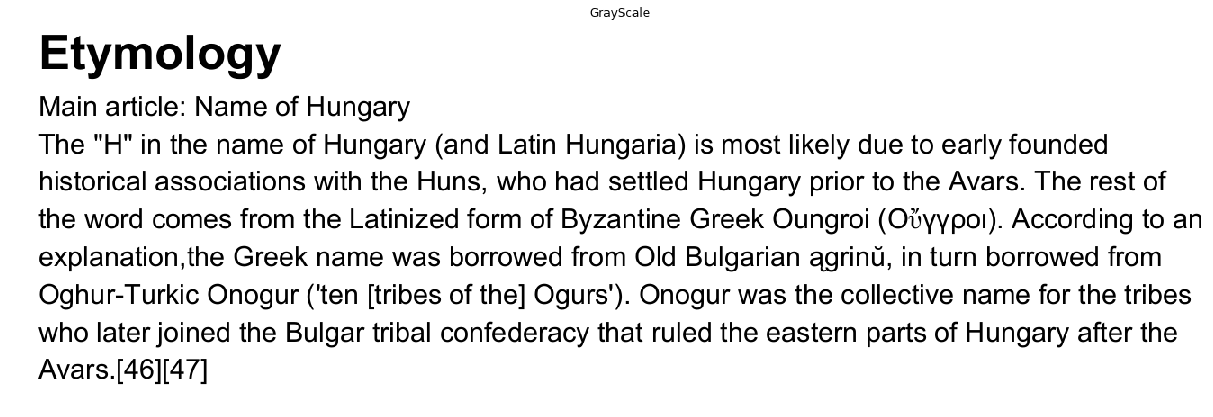

In [3]:
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plotimage(gray, 'GrayScale', invert=False)

## Convert to Black and White

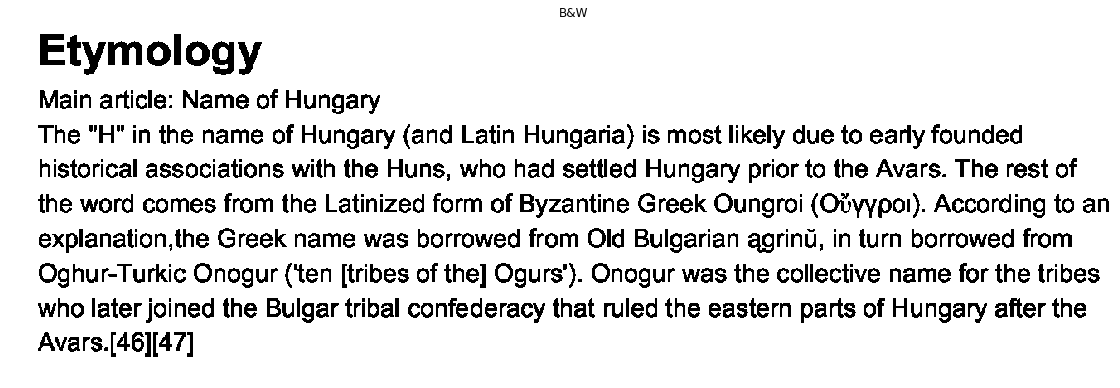

In [4]:
bw=1-gray_to_bw(gray, thresh)//255
plotimage(bw, 'B&W', figsize=(15,15))

### Vertical Segmentation

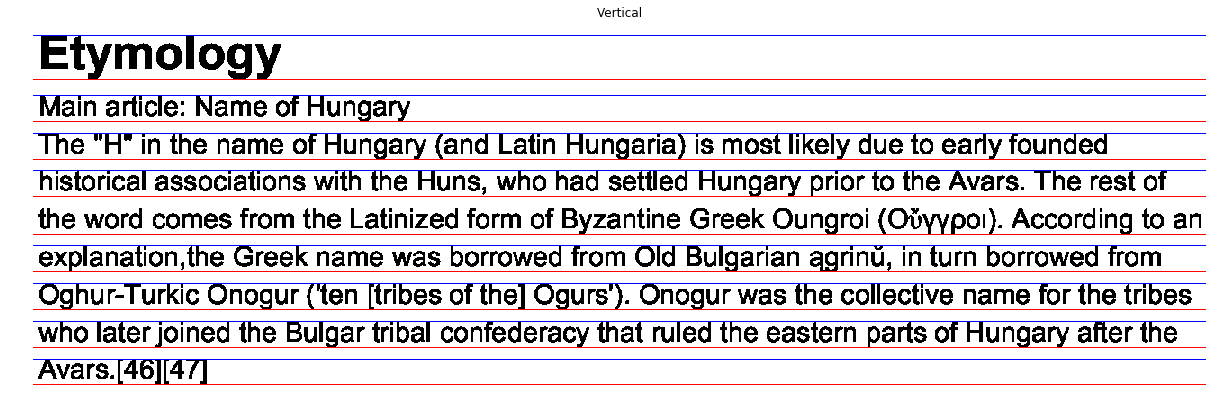

In [5]:
lines = vert_seg(bw)
vert = 255*bw.copy()
vert = cv2.cvtColor(vert, cv2.COLOR_GRAY2RGB)
draw_vert_lines(vert, lines)
plotimage(vert, 'Vertical')

### Horizontal Segmentation

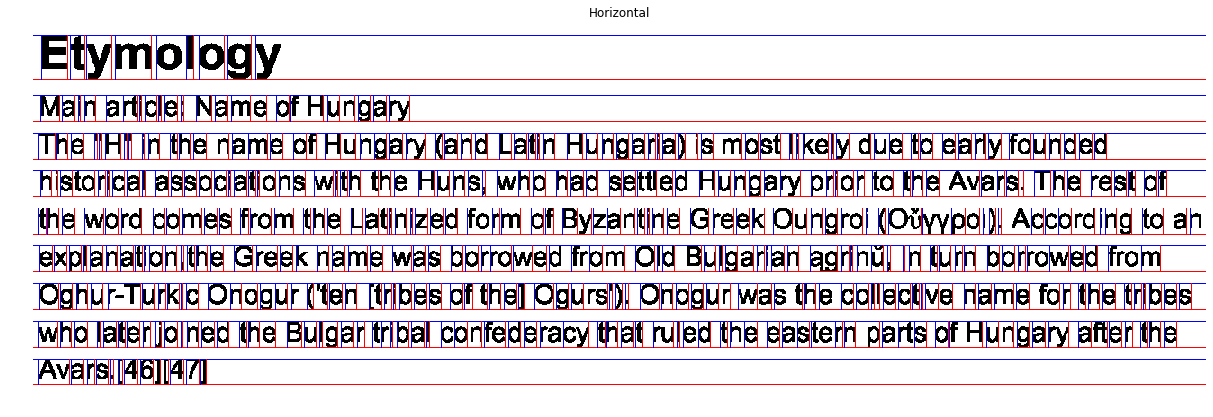

In [6]:
i = 0
start = 0

for line in lines:
    img = bw[line['start']:line['end'],:]
    line['chars'] = hor_seg(img)

hor = vert.copy()
for line in lines:
    start = line['start']
    end = line['end']
    draw_hor_lines(hor, line['chars'], start, end)

plotimage(hor, 'Horizontal')

## Plotting Some Random chars

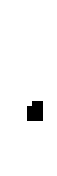

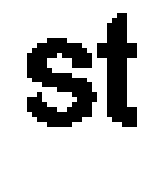

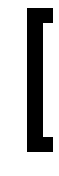

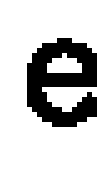

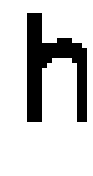

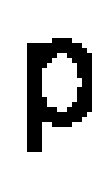

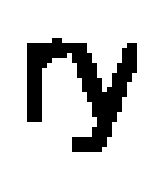

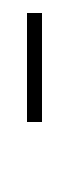

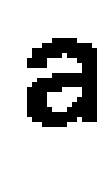

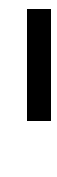

In [7]:
for k in range(10):
    i = random.randint(0,len(lines)-1)
    line = lines[i]
    j = random.randint(0,len(line['chars'])-1)
    char = line['chars'][j]
    
    img = bw[line['start']:line['end'],char['start']:char['end']]
    
    plotimage(img,'',(2,2))

### Vertical Segmentation for every Char

In [8]:
for line in lines:
    for char in line['chars']:
        img = bw[line['start']:line['end'],char['start']:char['end']]
        char['vertical_parts'] = vert_seg(img)

[{'start': 18, 'end': 21}]


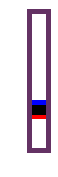

[{'start': 6, 'end': 28}]


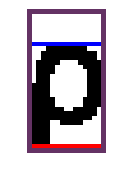

[{'start': 5, 'end': 22}]


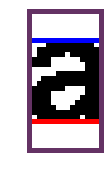

[{'start': 1, 'end': 22}]


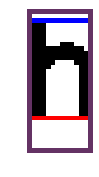

[{'start': 6, 'end': 23}]


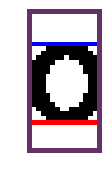

[{'start': 6, 'end': 22}]


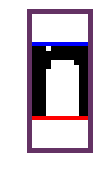

[{'start': 6, 'end': 22}]


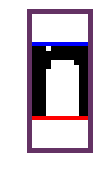

[{'start': 1, 'end': 38}]


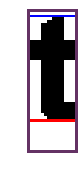

[{'start': 0, 'end': 21}]


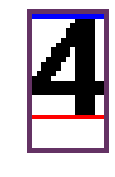

[{'start': 1, 'end': 22}]


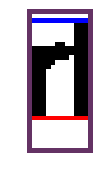

In [9]:
for k in range(10):
    i = random.randint(0,len(lines)-1)
    line = lines[i]
    j = random.randint(0,len(line['chars'])-1)
    char = line['chars'][j]
    
    img = 255*bw[line['start']:line['end'],char['start']:char['end']]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) 
    
    draw_vert_lines(img, char['vertical_parts'])
            
    img = draw_borders(img, color=violet)
#     img = draw_borders(img, color=0)
    print(char['vertical_parts'])
    plotimage(img,'', (2,2))

## Walsh-Functions

### Read walsh functions

In [10]:
with open(walsh_path) as f:
    s = f.read()
walsh_list = json.loads(s)
walsh = []
for l in walsh_list:
    walsh.append(np.array(l))

### Calculcate Walsh Vectors

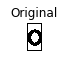

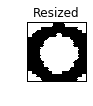

Walsh= [1889, 4119, 3663, 4233, 4415, 4329, 4129, 4287, 4027, 4121, 4313, 4115, 4165, 4079, 4167, 4077, 3481, 4239, 5067, 4253, 4579, 3917, 4457, 3951, 4151, 4117, 4289, 4051, 3981, 4023, 4107, 4057, 4195, 4065, 4469, 3951, 3853, 3975, 4139, 4017, 4269, 4075, 3983, 4081, 4027, 4125, 4025, 4127, 3991, 4181, 4453, 4167, 4229, 4031, 4351, 3997, 4157, 4091, 4019, 4157, 4079, 4049, 3953, 4015]


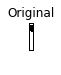

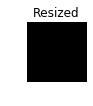

Walsh= [0, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096]


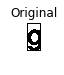

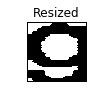

Walsh= [1703, 4281, 3907, 3697, 4153, 4239, 3813, 4487, 4113, 4063, 4301, 4255, 4067, 4301, 4255, 4061, 3429, 4115, 4465, 4595, 4067, 4501, 4559, 4021, 4251, 3989, 4247, 4269, 4017, 4167, 4157, 4079, 4123, 3921, 4219, 4253, 4069, 3935, 4157, 3939, 4405, 4071, 4021, 4075, 4031, 4061, 4039, 4105, 3869, 4127, 4229, 4299, 4083, 4233, 4243, 4061, 4259, 4129, 4059, 4053, 4065, 4187, 4129, 4071]


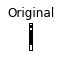

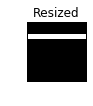

Walsh= [384, 4480, 4224, 4224, 3712, 3712, 3968, 3968, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096]


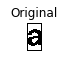

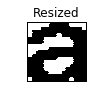

Walsh= [1325, 4391, 3843, 4045, 3917, 4491, 4351, 4277, 4303, 4309, 4089, 3967, 4279, 4273, 3917, 4063, 3717, 4411, 4487, 4381, 4921, 4107, 3999, 4073, 4323, 4197, 3985, 4163, 4239, 4029, 3985, 3991, 4239, 4025, 4197, 4127, 3943, 4053, 3945, 4143, 4173, 4003, 4039, 4109, 4093, 3943, 4115, 4037, 4123, 4233, 4109, 4219, 4375, 4065, 4125, 4063, 4277, 4127, 4099, 4109, 4121, 4047, 3979, 4041]


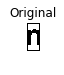

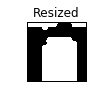

Walsh= [1997, 3629, 3765, 3765, 4377, 4377, 4249, 4249, 3899, 4251, 4291, 4291, 4199, 4199, 4167, 4167, 2925, 4557, 4533, 4533, 4125, 4125, 4149, 4149, 3807, 4159, 4047, 4047, 3959, 3959, 4071, 4071, 3827, 4243, 4107, 4107, 4007, 4007, 4135, 4135, 4353, 4001, 3961, 3961, 4053, 4053, 4085, 4085, 3795, 4211, 4235, 4235, 4131, 4131, 4107, 4107, 4325, 3973, 4085, 4085, 4173, 4173, 4061, 4061]


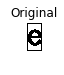

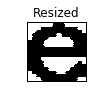

Walsh= [1448, 4094, 4074, 4316, 3836, 4358, 4654, 4284, 4028, 4214, 4314, 4048, 4276, 3978, 4138, 4068, 3814, 4216, 4708, 4330, 4770, 3952, 4208, 3946, 4210, 4160, 4340, 3926, 4042, 3980, 4020, 4098, 4332, 4094, 4282, 4000, 3948, 3962, 4010, 4036, 4216, 4118, 4058, 4044, 3988, 4070, 4126, 4092, 4146, 4184, 4292, 4198, 4298, 4036, 4204, 4042, 4134, 4096, 4132, 4090, 4002, 4024, 4024, 4018]


In [11]:
c = 7 #samples to plot

for line in lines:
    for char in line['chars']:
        start=line['start']
        end=line['end']
        
        if char['vertical_parts'] and len(char['vertical_parts'])>0:
            start=line['start']+char['vertical_parts'][0]['start']
            end=line['start']+char['vertical_parts'][-1]['end']
                    
        img = bw[start:end,char['start']:char['end']]
        img = img.copy()
        img = cv2.resize(img, (64,64))
        v = []
        for w in walsh:
            v.append(inner_prod(img, w))
        char['walsh_vector'] = v        
        
        if c and np.random.randint(10)==0:
            original_img = bw[line['start']:line['end'],char['start']:char['end']]
            plotimage(draw_borders(original_img,black),title='Original')
            plotimage(draw_borders(img,black), title='Resized')
            print("Walsh=", v)
            c-=1
        

### Vector Comparison

Distance = 13964


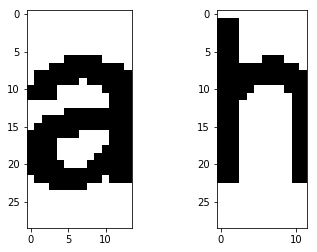

In [12]:
vecs = []
for k in range(2):
    i = np.random.randint(0, len(lines))
    j = np.random.randint(0, len(lines[i]['chars']))
    if k==0:
        i,j=1,1
    char = lines[i]['chars'][j]
    line_start = lines[i]['start']
    line_end = lines[i]['end']
    char_start = char['start']
    char_end = char['end']
    
    plt.subplot(121+k), plt.imshow(1-bw[line_start:line_end,char_start:char_end], cmap='gray')
    vecs.append(char['walsh_vector'])
    
print("Distance =", distance(vecs[0], vecs[1]))
    
# v1 = lines[1]['chars'][0]['walsh_vector']
# v2 = lines[1]['chars'][5]['walsh_vector']

# inner_prod(v1, v2)

## Read Database

In [13]:
with open(db_path) as f:
    db = json.loads(f.read())

### Compare Letters to Database

In [14]:
for i in range(len(lines)):
    for j in range(len(lines[i]['chars'])):
    #     i = np.random.randint(0, len(lines))
    #     j = np.random.randint(0, len(lines[i]['chars']))
    #     if k==0:
    #         i,j=1,1
        char = lines[i]['chars'][j]
        line_start = lines[i]['start']
        line_end = lines[i]['end']
        char_start = char['start']
        char_end = char['end']

#         plotimage(bw[line_start:line_end,char_start:char_end], figsize=(2,2))
        min_dist = -1
        min_letter = 'NaN'
        for letter in db:
            dist = distance(letter['walsh_vector'], char['walsh_vector'])
            if min_dist == -1 or dist < min_dist:
                min_dist = dist
                min_letter = letter['character']
        char['pred']=min_letter
        print(min_letter, end='')
    print()



EtymoIogy
M8In8dIcIeIN8meofHung8W
TheIIHIIInthen8meofHung8W(8ndL8tInHung8rI8)IsmoIIIhIyduetoe8hySunded
hIsbrIc8I8ssocI8tIonswIththeHuns,whoh8dsejedHung8WprIorbtheI8rsIThemstof
thewoHcomesfmmtheL8tInI7edSrmofBy78ntIneGmekoungmI(EWpoI)IAccoHIngb8n
expI8n8tIon,theGmekn8mew8sbormwedWomoIdBuIg8rI8njrInu,Inturnbormwedhm
oghuFurkIconogur(jenRrIbesofthe]oguBI)Ionogurw8sthecoIIectIVen8meSrthetrIbes
whoI8ter]oInedtheBuIg8rtrIb8IconSdemWth8tmIedthee8shrnp8dsofHung8W8werthe
I8rsI[46][47]


### Save result in a json file

In [15]:
s = json.dumps({"image_path": image_path, "threshold": thresh, "lines":lines}, indent=2)
with open(image_path+'.lines.json', 'w') as f:
    f.write(s)